# International football results from 1872 to 2017 

This dataset is provided by MartJ on [Kaggle](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017).

## Content

This dataset includes 38,361 results of international football matches starting from the very first official math in 1872 up to 2017. The matches range from World Cup to Baltic Cup to regular friendly matches. The matches are strictly men's full internationals and the data do not include Olympic Games or matches where at least one of the teams was the nation's B-team, U-23 or a league select team.

It includes the following columns:
* date: the date the match has been played;
* home_team: the team which played at home;
* away_team: the team which played away;
* home_ft: the score for the home team;
* away_ft: the score for the away team;
* tournament: friendly, world cup, copa america, etc;
* city: the city where the match has been played;
* country: the country where the match has been played.

## Acknowledgements

The data is gathered from several sources including but not limited to wikipedia.com, fifa.com, rsssf.com and individual football associations' websites.

## Code

The entire code of this analysis is on my [Github](https://github.com/StevenGolovkine/internationalFootballResults) repository.

-----

## Load the used libraries 

In [1]:
get_ipython().magic('matplotlib inline')
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")

## Import the data

In [2]:
results = pd.read_csv("results.csv", sep=',', header=0)

In [3]:
# Let's look at the data
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland
1,1873-03-08,England,Scotland,4,2,Friendly,London,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland


In [4]:
# Do the data have missing/null values?
print("There is", results.isna().sum().sum(), "missing value.")
print("There is", results.isnull().sum().sum(), "null value.")

There is 0 missing value.
There is 0 null value.


In [5]:
print("Since ", results.date[0], ", there were ", len(results), " international football matches (until ", results.date[len(results) - 1], ").", sep='')

Since 1872-11-30, there were 38685 international football matches (until 2017-11-15).


## Exploration of the data

* #### Which country played the most? 

In [6]:
count_match_home = results.home_team.value_counts()
count_match_away = results.away_team.value_counts()
count_match = pd.DataFrame([count_match_home, count_match_away]).transpose().fillna(0)
count_match['total'] = count_match.home_team + count_match.away_team
count_match = count_match.sort_values('total', ascending=False)

Quite surprisingly, Sweden played the most games since the data are recorded. Swedish are followed by four important football nation: England (who made the rules), Argentina (who are one of the most titles in Copa América), Brazil (who are the most titles in World Cup) and Germany (who are one of the most titles in European Cup).

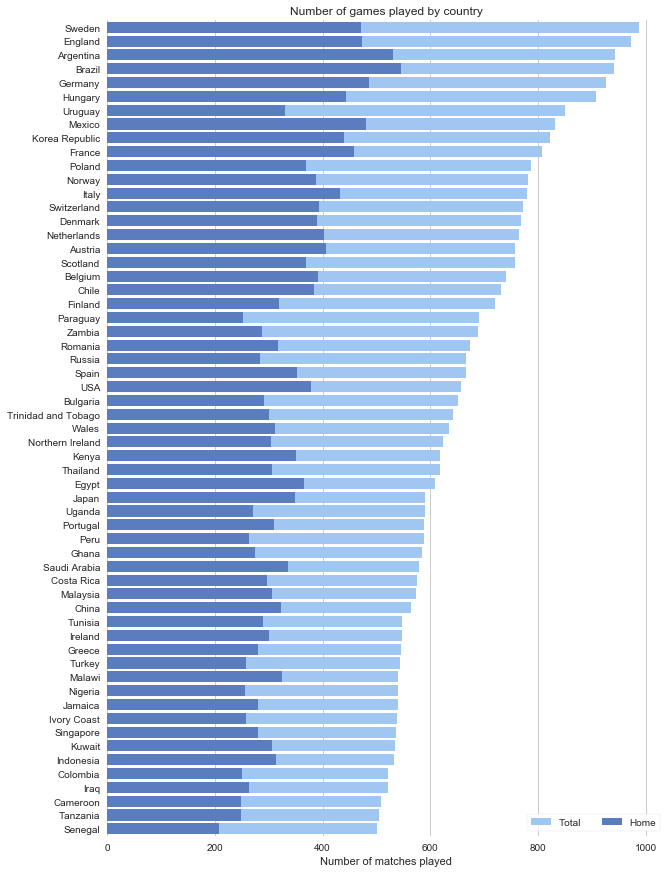

In [7]:
count_match_display = count_match[count_match.total > 500]

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 15))

# Plot the total matches
sns.set_color_codes("pastel")
sns.barplot(x='total', y=count_match_display.index, data=count_match_display, label='Total', color='b')

# Plot the home match 
sns.set_color_codes("muted")
sns.barplot(x="home_team", y=count_match_display.index, data=count_match_display, label='Home', color='b')

# Add legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set_title("Number of games played by country")
ax.set(xlabel="Number of matches played")
sns.despine(left=True, bottom=True)

* #### Which country won the most?

In [8]:
winner = pd.Series(np.zeros(len(results)))

for idx in results.index:
    if results.home_score.iloc[idx] > results.away_score.iloc[idx] :
        winner.iloc[idx] = results.home_team.iloc[idx]
    elif results.home_score.iloc[idx] < results.away_score.iloc[idx] :
        winner.iloc[idx] = results.away_team.iloc[idx]
    else :
        winner.iloc[idx] = None
        
count_win = pd.DataFrame(winner.value_counts(), columns=['Win'])

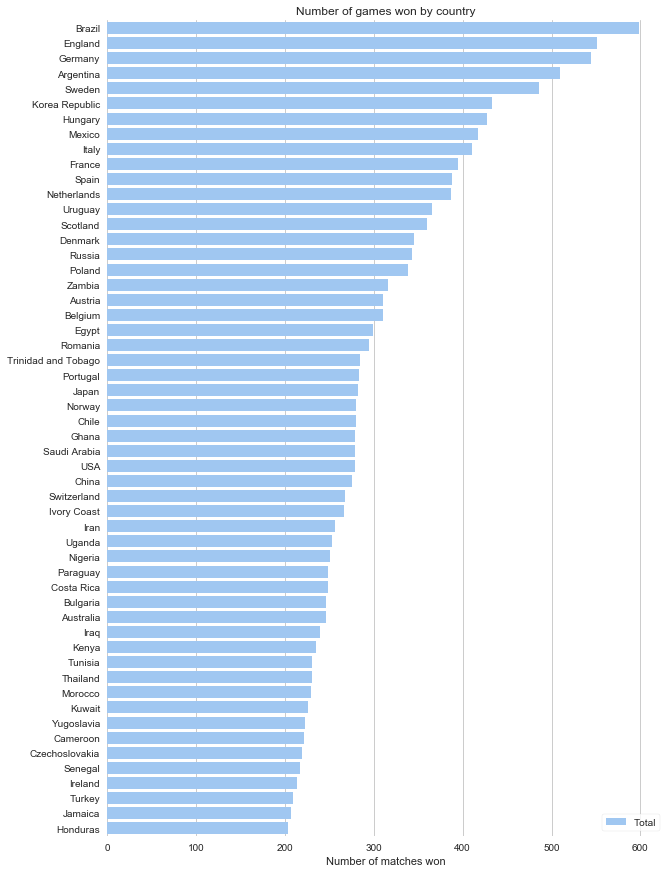

In [14]:
count_win_display = count_win[count_win > 200].dropna()

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 15))

# Plot the total matches
sns.set_color_codes("pastel")
sns.barplot(x='Win', y=count_win_display.index, data=count_win_display, label='Total', color='b')

# Add legend and informative axis label
ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set_title("Number of games won by country")
ax.set(xlabel="Number of matches won")
sns.despine(left=True, bottom=True)

Mechanically, we find the same teams in the most played graph and in the most won graph (of course, the more you played, the more you have possibility to have a high number of win). But what if we look at the winning percentage ? First, only around 20 countries have a winning percentage greater than 50%. Second, some "classical" countries are on top of the ranking but we also see some smaller countries like Nauru, Cantabria, Jersey, ...

In [15]:
winner_percent = pd.DataFrame(count_win['Win'] / pd.DataFrame(count_match['total'])['total'], columns=['Percent'])

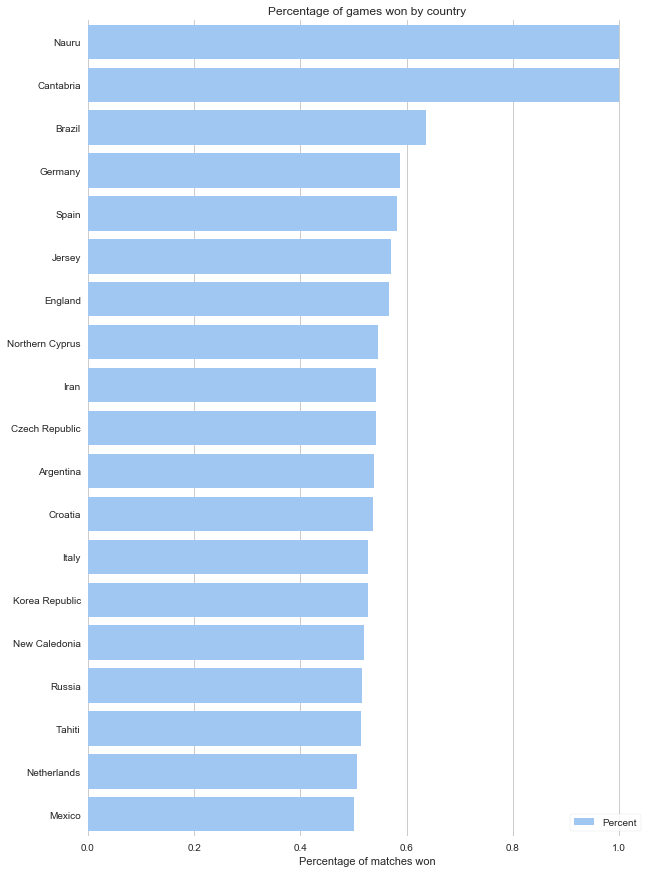

In [16]:
percent_win_display = winner_percent[winner_percent > 0.5].dropna().sort_values(by='Percent', ascending=False)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 15))

# Plot the total matches
sns.set_color_codes("pastel")
sns.barplot(x='Percent', y=percent_win_display.index, data=percent_win_display, label='Percent', color='b')

# Add legend and informative axis label
ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set_title("Percentage of games won by country")
ax.set(xlabel="Percentage of matches won")
sns.despine(left=True, bottom=True)

* #### Should Nauru and Cantabria be considered has the "best" football countries in the world?

Nauru is an island country in Micronesia (Oceania), in the Central Pacific. It is known as one of the smallest country in the world. Cantabria is a Spanish community. 

In [32]:
results[(results.home_team == 'Nauru') | (results.away_team == 'Nauru')]

,date,home_team,away_team,home_score,away_score,tournament,city,country
18379,1994-10-02,Nauru,Solomon Islands,2,1,Friendly,Denigomodu,Nauru


In [33]:
results[(results.home_team == 'Cantabria') | (results.away_team == 'Cantabria')]

,date,home_team,away_team,home_score,away_score,tournament,city,country
20825,1997-12-23,Cantabria,Latvia,3,0,Friendly,Santander,Spain


Thus, this two countries played only one official match. So, we can not say that they are the "best" football countries in the world. More likely, this title will go to Brazil, Germany or Spain.

* #### Which countries played the most into international tournaments?

In [50]:
pd.DataFrame(results.tournament.value_counts())

,tournament
Friendly,16202
FIFA World Cup qualification,7074
UEFA Euro qualification,2332
African Cup of Nations qualification,1558
FIFA World Cup,836
Copa América,787
AFC Asian Cup qualification,711
African Cup of Nations,638
CFU Caribbean Cup qualification,606
CECAFA Cup,600
